In [ ]:
import networkx as nx
import json

import umap
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

import pandas as pd
import numpy as np
from tqdm import tqdm
import random
from scipy.linalg import sqrtm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from karateclub.utils.walker import RandomWalker, BiasedRandomWalker
from karateclub import DeepWalk, Node2Vec
from gensim.models.word2vec import Word2Vec


: 

In [9]:
pip install karateclub --upgrade

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\PythonInterpreter\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip uninstall umap
!pip install umap-learn

Could not fetch URL https://pypi.org/simple/umap-learn/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/umap-learn/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping
Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


ERROR: Could not find a version that satisfies the requirement umap-learn (from versions: none)
ERROR: No matching distribution found for umap-learn


Données du Club de Karaté fourni avec le package Networkx. Chaque élève de Karaté du graphe aparatient à 1 des 2 clubs de Karaté (Officier ou M. Hi)

In [2]:
G = nx.karate_club_graph()  # load data

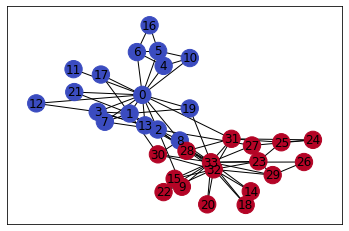

In [3]:
clubs = []  # list to populate with labels
for n in G.nodes:
    c = G.nodes[n]['club']  # karate club name, can be either 'Officer' or 'Mr. Hi'
    clubs.append(1 if c == 'Officer' else 0)

pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
nx.draw_networkx(G, pos=pos, node_color = clubs, cmap='coolwarm') # Plot the graph

Nous pouvons voir les noeuds sont colorés selon les clubs, et on  voit bien que les membres d'un même clubs sont principalement liés à l'exception de quelques uns

In [ ]:
model = DeepWalk(dimensions=124)  # node embedding algorithm
model.fit(G)  # fit it on the graph
embedding = model.get_embedding()  # extract embeddings

print('Number of karate club members:', len(G.nodes))
print('Embedding array shape:', embedding.shape)

Nous avons representé les chaque membre du club par un vecteur de 124.
Maintenant, reduisons cette dimension à 2 pour ensuite representer dans le plan (x,y).

In [25]:
u = umap.UMAP(random_state=42)
umap_embs = u.fit_transform(embedding)

ax = sns.scatterplot(x = umap_embs[:, 0], y = umap_embs[:, 1], hue = clubs)
a = pd.DataFrame({'x': umap_embs[:, 0], 'y': umap_embs[:, 1], 'val': G.nodes})
for i, point in a.iterrows():
    ax.text(point['x']+.02, point['y'], str(point['val']))

AttributeError: module 'umap' has no attribute 'UMAP'